# Melbourne Housing Data Analysis

In this notebook, we will analyze the Melbourne housing dataset. We'll start by importing the necessary libraries, reading the data, and then performing some data preprocessing steps.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import mstats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

In [2]:
# Set the style and color palette for the plots
sns.set_style('whitegrid')
sns.set_palette('pastel')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Reading the dataset
df = pd.read_csv('..\Raw_Data\Melbourne_housing_FULL.csv')
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

# Data Preprocessing

Let's start by exploring the dataset, handling missing values, and performing some initial preprocessing steps.

In [4]:
# Dropping unnecessary columns
columns_to_drop = ["Address", "Method", "SellerG", "Bedroom2", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
# Renaming columns for clarity
df.rename(columns={"Landsize": "Land Size", "Regionname": "Region", "Propertycount": "Property Count"}, inplace=True)

In [6]:
# Handling missing values
df.dropna(inplace=True)

In [7]:
# Checking for duplicates and removing them
df.drop_duplicates(inplace=True)

In [8]:
# Changing the format of the 'Date' column and extracting the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df.drop(['Date'], axis=1, inplace=True)

C:\Users\akbar\AppData\Local\Temp\ipykernel_1952\1330823358.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
# Displaying the cleaned dataframe
df.head()

Suburb  Rooms Type      Price  Distance  Postcode  Bathroom  Car  \
1  Abbotsford      2    h  1480000.0       2.5    3067.0       1.0  1.0   
2  Abbotsford      2    h  1035000.0       2.5    3067.0       1.0  0.0   
4  Abbotsford      3    h  1465000.0       2.5    3067.0       2.0  0.0   
5  Abbotsford      3    h   850000.0       2.5    3067.0       2.0  1.0   
6  Abbotsford      4    h  1600000.0       2.5    3067.0       1.0  2.0   

   Land Size                 Region  Property Count  Year  
1      202.0  Northern Metropolitan          4019.0  2016  
2      156.0  Northern Metropolitan          4019.0  2016  
4      134.0  Northern Metropolitan          4019.0  2017  
5       94.0  Northern Metropolitan          4019.0  2017  
6      120.0  Northern Metropolitan          4019.0  2016

# Exploratory Data Analysis (EDA) 

EDA is a comprehensive process, so I'll start by performing the following steps:

- **Data Overview**: Understand the shape, column names, and basic statistics of the dataset.
- **Missing Values**: Check for any missing values in the dataset.
- **Data Distribution**: Examine the distribution of values in each column, especially for numerical features.
- **Categorical Data Analysis**: Investigate the unique values and counts for categorical features.
- **Correlation Analysis**: Understand the relationships between numerical features.
- **Visualizations**: Generate relevant visualizations to better understand the data.

# Cleaned Data Overview

In [10]:
# Data overview
shape = df.shape
column_names = df.columns.tolist()
basic_statistics = df.describe(include='all')

shape, column_names, basic_statistics.head()

((17698, 12),
 ['Suburb',
  'Rooms',
  'Type',
  'Price',
  'Distance',
  'Postcode',
  'Bathroom',
  'Car',
  'Land Size',
  'Region',
  'Property Count',
  'Year'],
            Suburb         Rooms   Type         Price      Distance  \
 count       17698  17698.000000  17698  1.769800e+04  17698.000000   
 unique        333           NaN      3           NaN           NaN   
 top     Reservoir           NaN      h           NaN           NaN   
 freq          431           NaN  13351           NaN           NaN   
 mean          NaN      3.053904    NaN  1.094756e+06     11.155023   
 
             Postcode      Bathroom           Car     Land Size  \
 count   17698.000000  17698.000000  17698.000000  17698.000000   
 unique           NaN           NaN           NaN           NaN   
 top              NaN           NaN           NaN           NaN   
 freq             NaN           NaN           NaN           NaN   
 mean     3111.936716      1.584868      1.698893    594.671771   
 
 

**Basic Statistics:**

- The average number of rooms is approximately 3.05.
- There are 3 unique property types, with houses ('h') being the most common.
- The average price of properties is approximately $1,094,756.
- The average distance from the city center is approximately 11.16 km.
- The average number of bathrooms is approximately 1.58.
- On average, properties have space for about 1.70 cars.
- The average land size is approximately 594.67 sq.m.
- There are 8 unique regions, with the 'Southern Metropolitan' region being the most common.
- The average property count in the dataset is about 7,477.
- The average year of the properties in the dataset is approximately 2016.77.

## Missing Values

In [11]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

Suburb            0
Rooms             0
Type              0
Price             0
Distance          0
Postcode          0
Bathroom          0
Car               0
Land Size         0
Region            0
Property Count    0
Year              0
dtype: int64

## Data Distribution

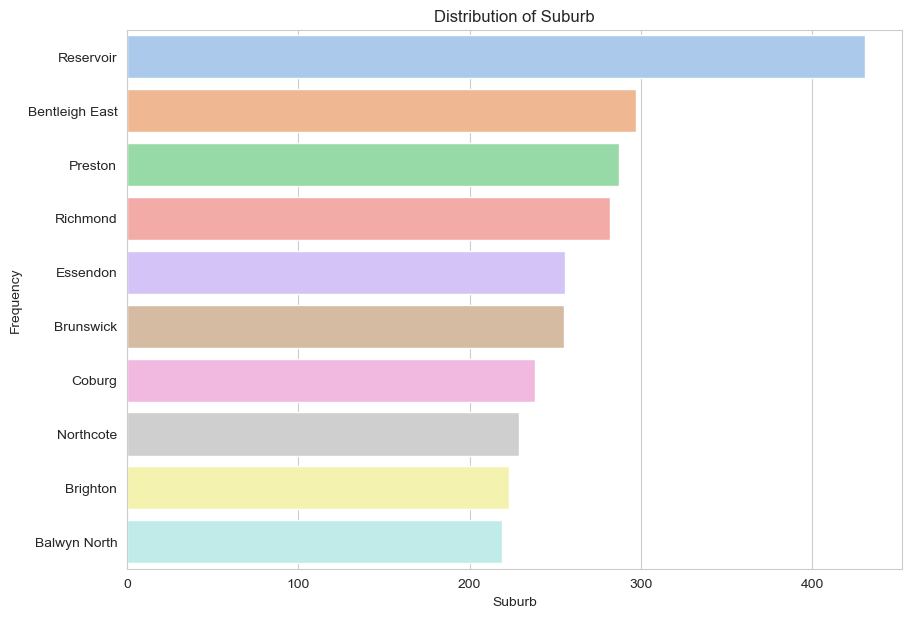

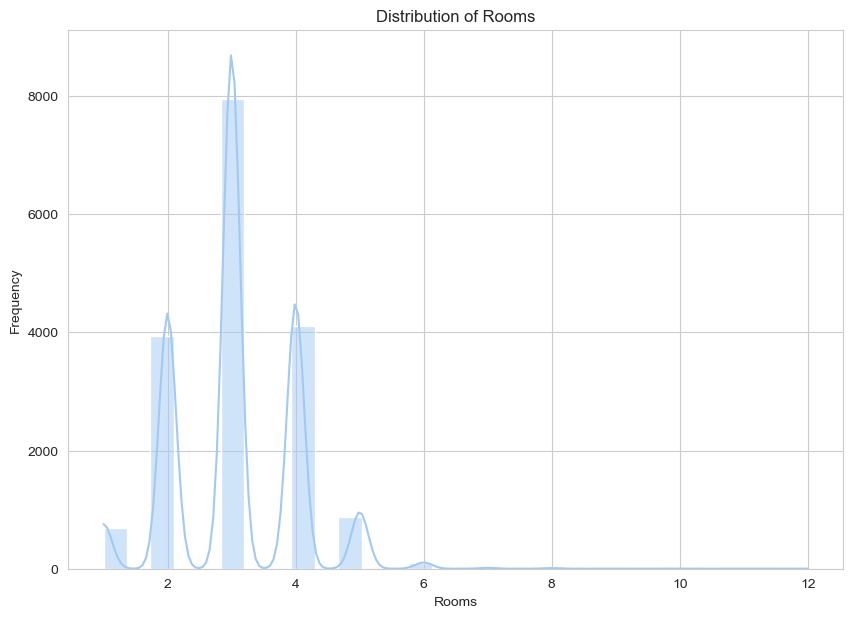

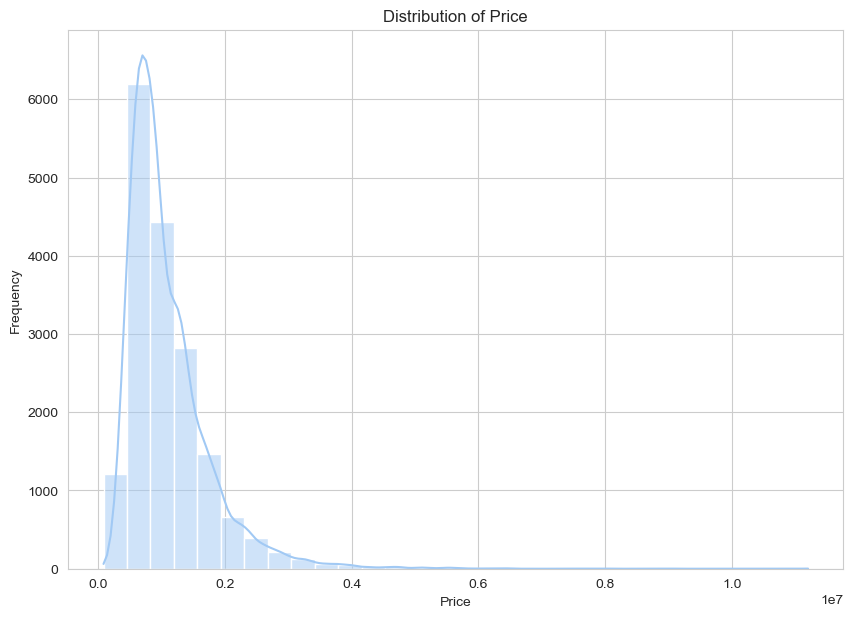

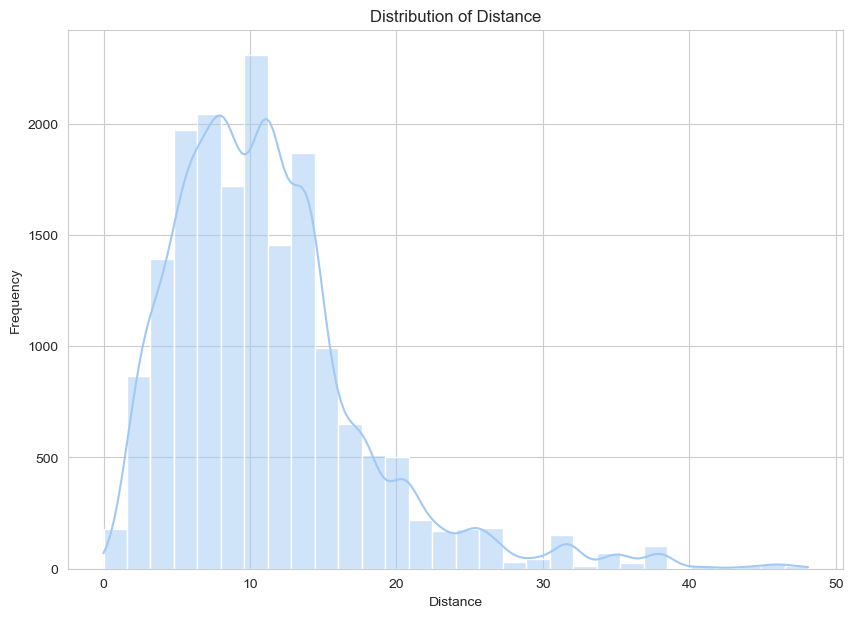

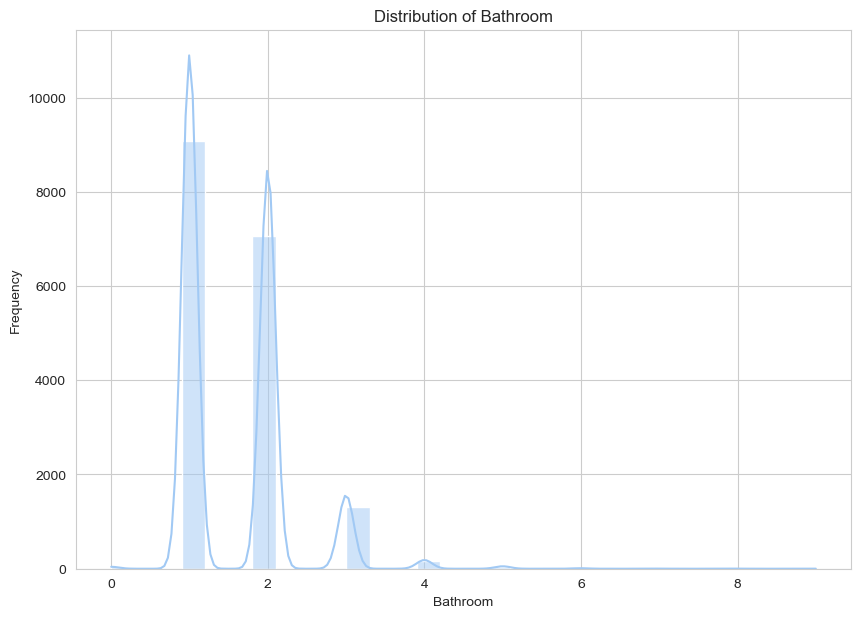

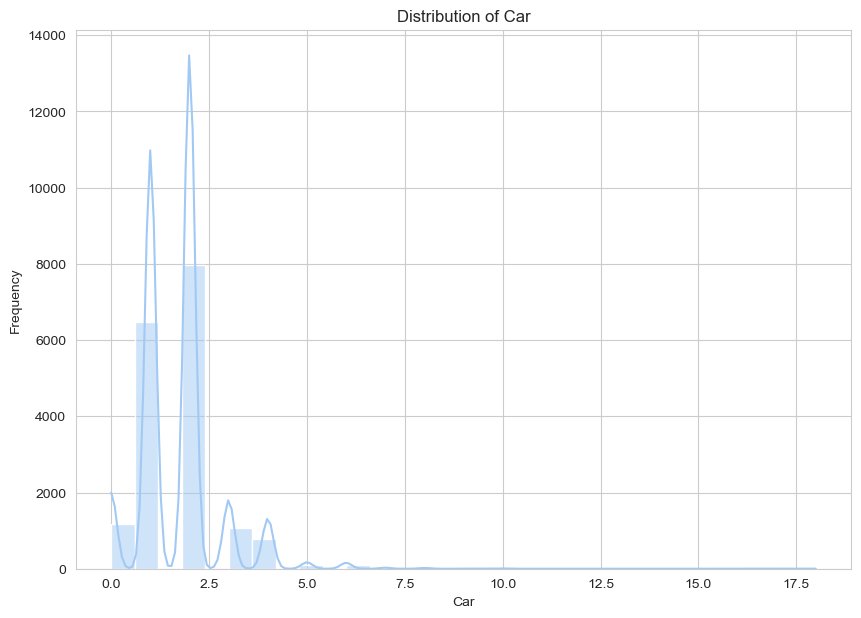

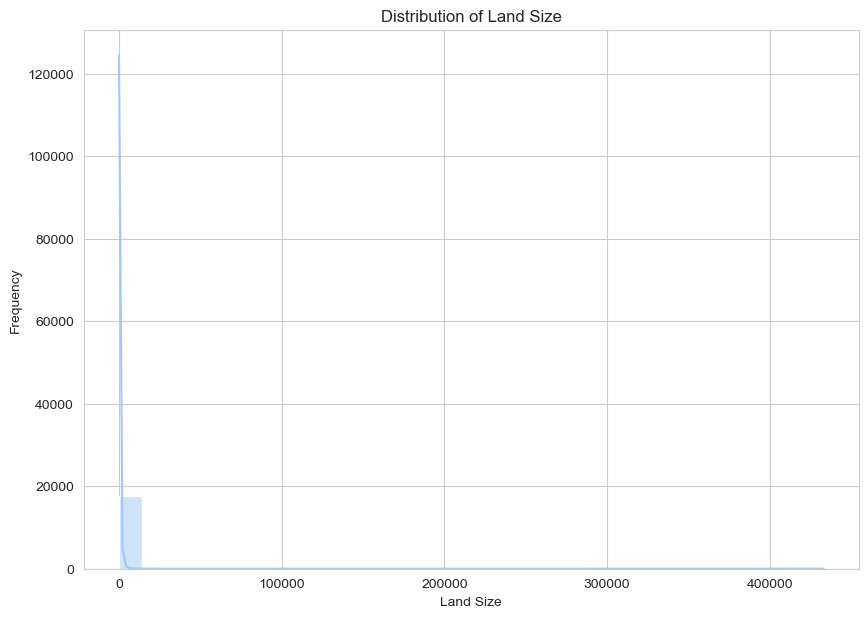

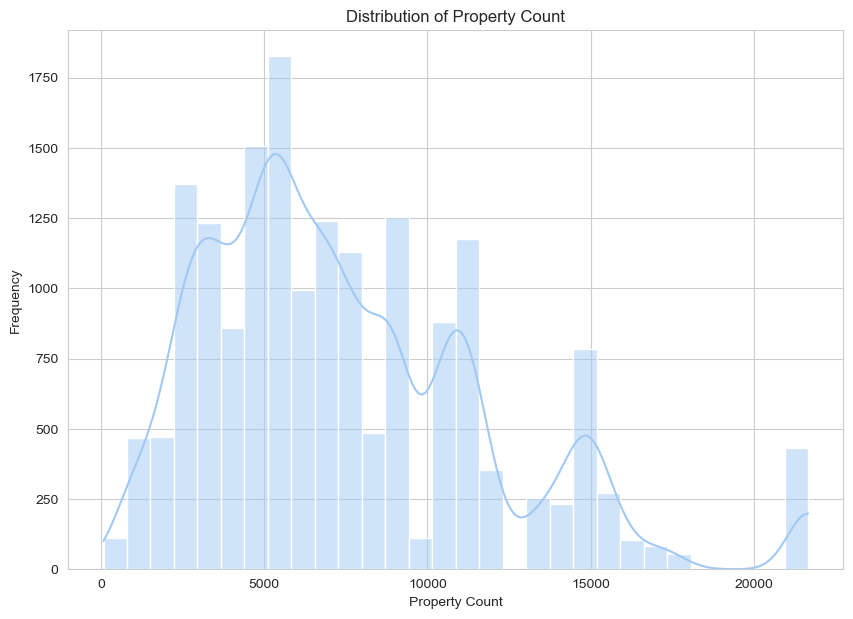

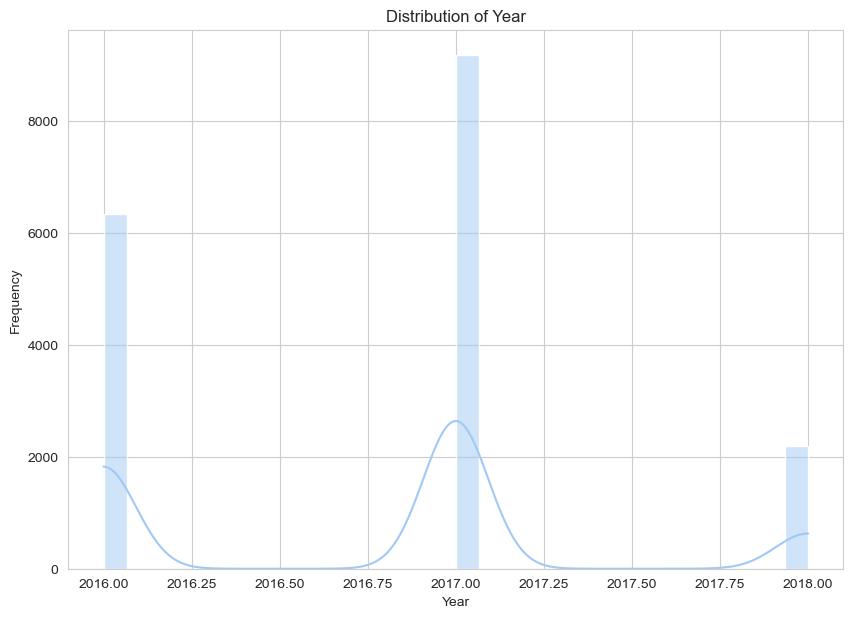

In [12]:
# List of numerical columns
numerical_cols = ['Suburb','Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Land Size', 'Property Count', 'Year']

for col in numerical_cols:
    # Set up the figure size
    plt.figure(figsize=(10, 7))
    
    # For the 'Suburb' column, only plot the top 10 most frequent suburbs
    if col == 'Suburb':
        top_suburbs = df['Suburb'].value_counts().head(10).index
        sns.countplot(data=df[df['Suburb'].isin(top_suburbs)], y='Suburb', order=top_suburbs)
    else:
        sns.histplot(df[col], bins=30, kde=True)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Save the figure as a separate image
    plt.savefig(f'../EDA_Output/data_distribution_{col}.jpg')
    plt.show()

- **Suburb**: Reservoir has the highest number of data.
- **Rooms**: Most properties have between 2 to 4 rooms.
- **Price**: The distribution is right-skewed, meaning most properties are priced at the lower end with a few properties at the higher price range.
- **Distance**: Most properties are located within 20 km from the city center, with a peak around 5-10 km.
- **Bathroom**: The majority of properties have 1 or 2 bathrooms.
- **Car**: Most properties can accommodate 1 or 2 cars, though there are properties that can accommodate more.
- **Land Size**: The distribution is right-skewed. Most properties have a land size less than 1000 sq.m, but there are a few with larger land sizes.
- **Property Count**: A wide range of property counts, with some peaks observed.
- **Year**: Most of the properties in the dataset are from around the year 2016-2018.

## Categorical Data Analysis

In [13]:
# Let's investigate the unique values and counts for the categorical features
# Categorical features analysis
categorical_cols = ['Type', 'Region', 'Suburb']

# Get unique values and their counts for categorical features
categorical_counts = {}
for col in categorical_cols:
    categorical_counts[col] = df[col].value_counts()

categorical_counts

{'Type': h    13351
 u     3049
 t     1298
 Name: Type, dtype: int64,
 'Region': Southern Metropolitan         5530
 Northern Metropolitan         5060
 Western Metropolitan          3936
 Eastern Metropolitan          2111
 South-Eastern Metropolitan     789
 Eastern Victoria               105
 Northern Victoria              104
 Western Victoria                63
 Name: Region, dtype: int64,
 'Suburb': Reservoir         431
 Bentleigh East    297
 Preston           287
 Richmond          282
 Essendon          256
                  ... 
 Plumpton            1
 Hurstbridge         1
 Wonga Park          1
 Whittlesea          1
 Werribee South      1
 Name: Suburb, Length: 333, dtype: int64}

**The distribution of the categorical features is as follows:**

- **Type**:
  - **House (h)**: 13,351
  - **Unit (u)**: 3,049
  - **Townhouse (t)**: 1,298
- **Region**:
  - **Southern Metropolitan**: 5,530
  - **Northern Metropolitan**: 5,060
  - **Western Metropolitan**: 3,936
  - **Eastern Metropolitan**: 2,111
  - **South-Eastern Metropolitan**: 789
  - **Eastern Victoria**: 105
  - **Northern Victoria**: 104
  - **Western Victoria**: 63

From the data, we can see that houses are the most common property type. Additionally, the **Southern Metropolitan** and **Northern Metropolitan** regions have the highest number of properties.

## Correlation Analysis

C:\Users\akbar\AppData\Local\Temp\ipykernel_1952\3641476252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


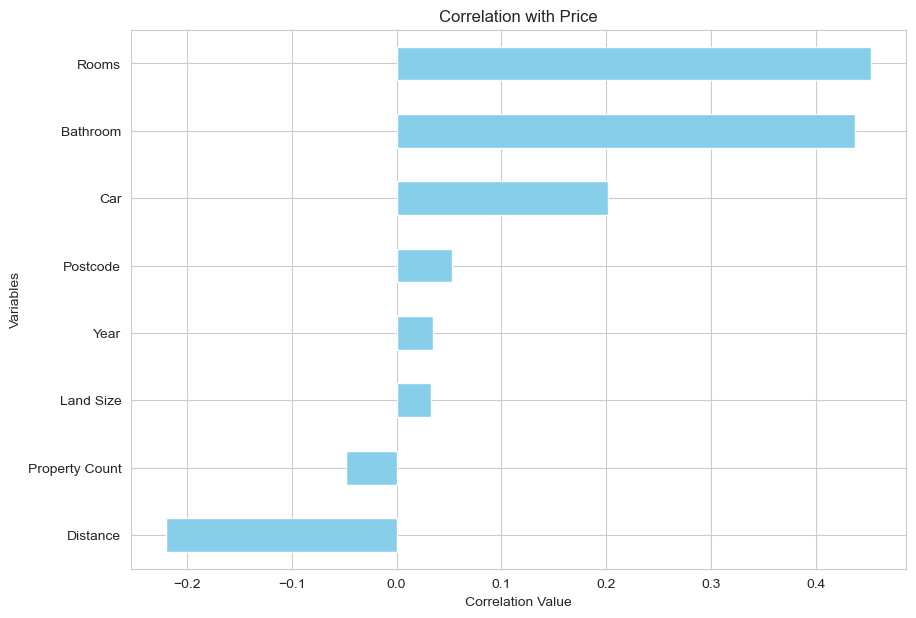

In [14]:
# Compute the correlation analysis
corr = df.corr()

# Extract correlation values with 'Price'
corr_price = corr['Price'].drop('Price', axis=0)

# Sort the values
corr_price = corr_price.sort_values()

# Plot
plt.figure(figsize=(10, 7))
corr_price.plot(kind='barh', color='skyblue')
plt.title("Correlation with Price")
plt.xlabel("Correlation Value")
plt.ylabel("Variables")
plt.savefig('../EDA_Output/features_correlation_with_price.jpg')
plt.show()

In [15]:
# Base on the correlation analysis we are dropping columns that are close to 0
df.drop(['Postcode',
         'Year',
         'Land Size',
         'Property Count'], axis=1, inplace=True)
df

Suburb  Rooms Type      Price  Distance  Bathroom  Car  \
1      Abbotsford      2    h  1480000.0       2.5       1.0  1.0   
2      Abbotsford      2    h  1035000.0       2.5       1.0  0.0   
4      Abbotsford      3    h  1465000.0       2.5       2.0  0.0   
5      Abbotsford      3    h   850000.0       2.5       2.0  1.0   
6      Abbotsford      4    h  1600000.0       2.5       1.0  2.0   
...           ...    ...  ...        ...       ...       ...  ...   
34849     Wollert      3    h   570000.0      25.5       2.0  2.0   
34852  Yarraville      4    h  1480000.0       6.3       1.0  3.0   
34853  Yarraville      2    h   888000.0       6.3       2.0  1.0   
34854  Yarraville      2    t   705000.0       6.3       1.0  2.0   
34856  Yarraville      2    h  1020000.0       6.3       1.0  0.0   

                      Region  
1      Northern Metropolitan  
2      Northern Metropolitan  
4      Northern Metropolitan  
5      Northern Metropolitan  
6      Northern Metropolitan  
...                      ...  
34849  Northern Metropolitan  
34852   Western Metropolitan  
34853   Western Metropolitan  
34854   Western Metropolitan  
34856   Western Metropolitan  

[17698 rows x 8 columns]

**This visualization provides a clear picture of how each variable is related to the property price:**

- **Rooms**, **Bathroom**, and **Car** have positive correlations with the price, suggesting that as their values increase, the property price tends to increase as well. Among them, the number of **Rooms** has the strongest positive correlation with price.
- **Distance** has a negative correlation with the price, suggesting that properties closer to the city center might be priced higher.
- **Year**, **Land Size**, **Postcode**, and **Property Count** have weaker correlations with the price.

## Visualizations

<Figure size 2000x1500 with 0 Axes>

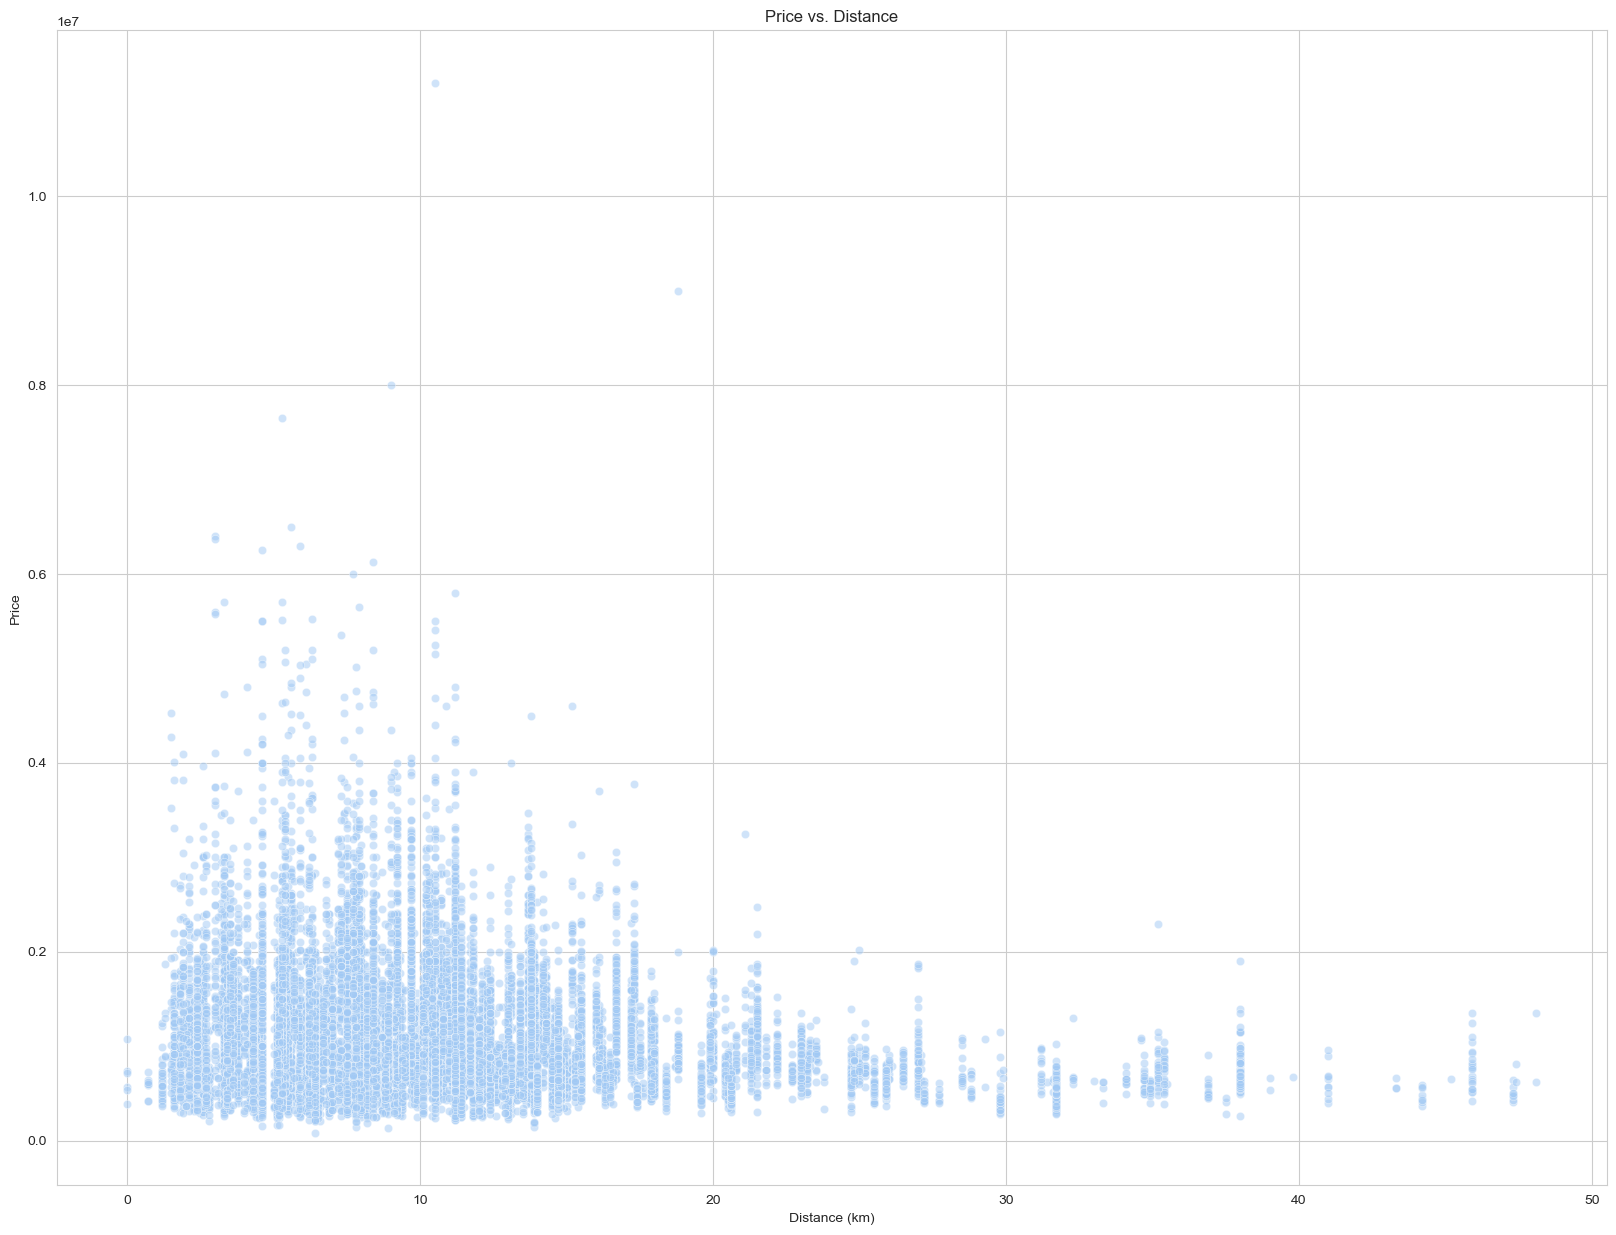

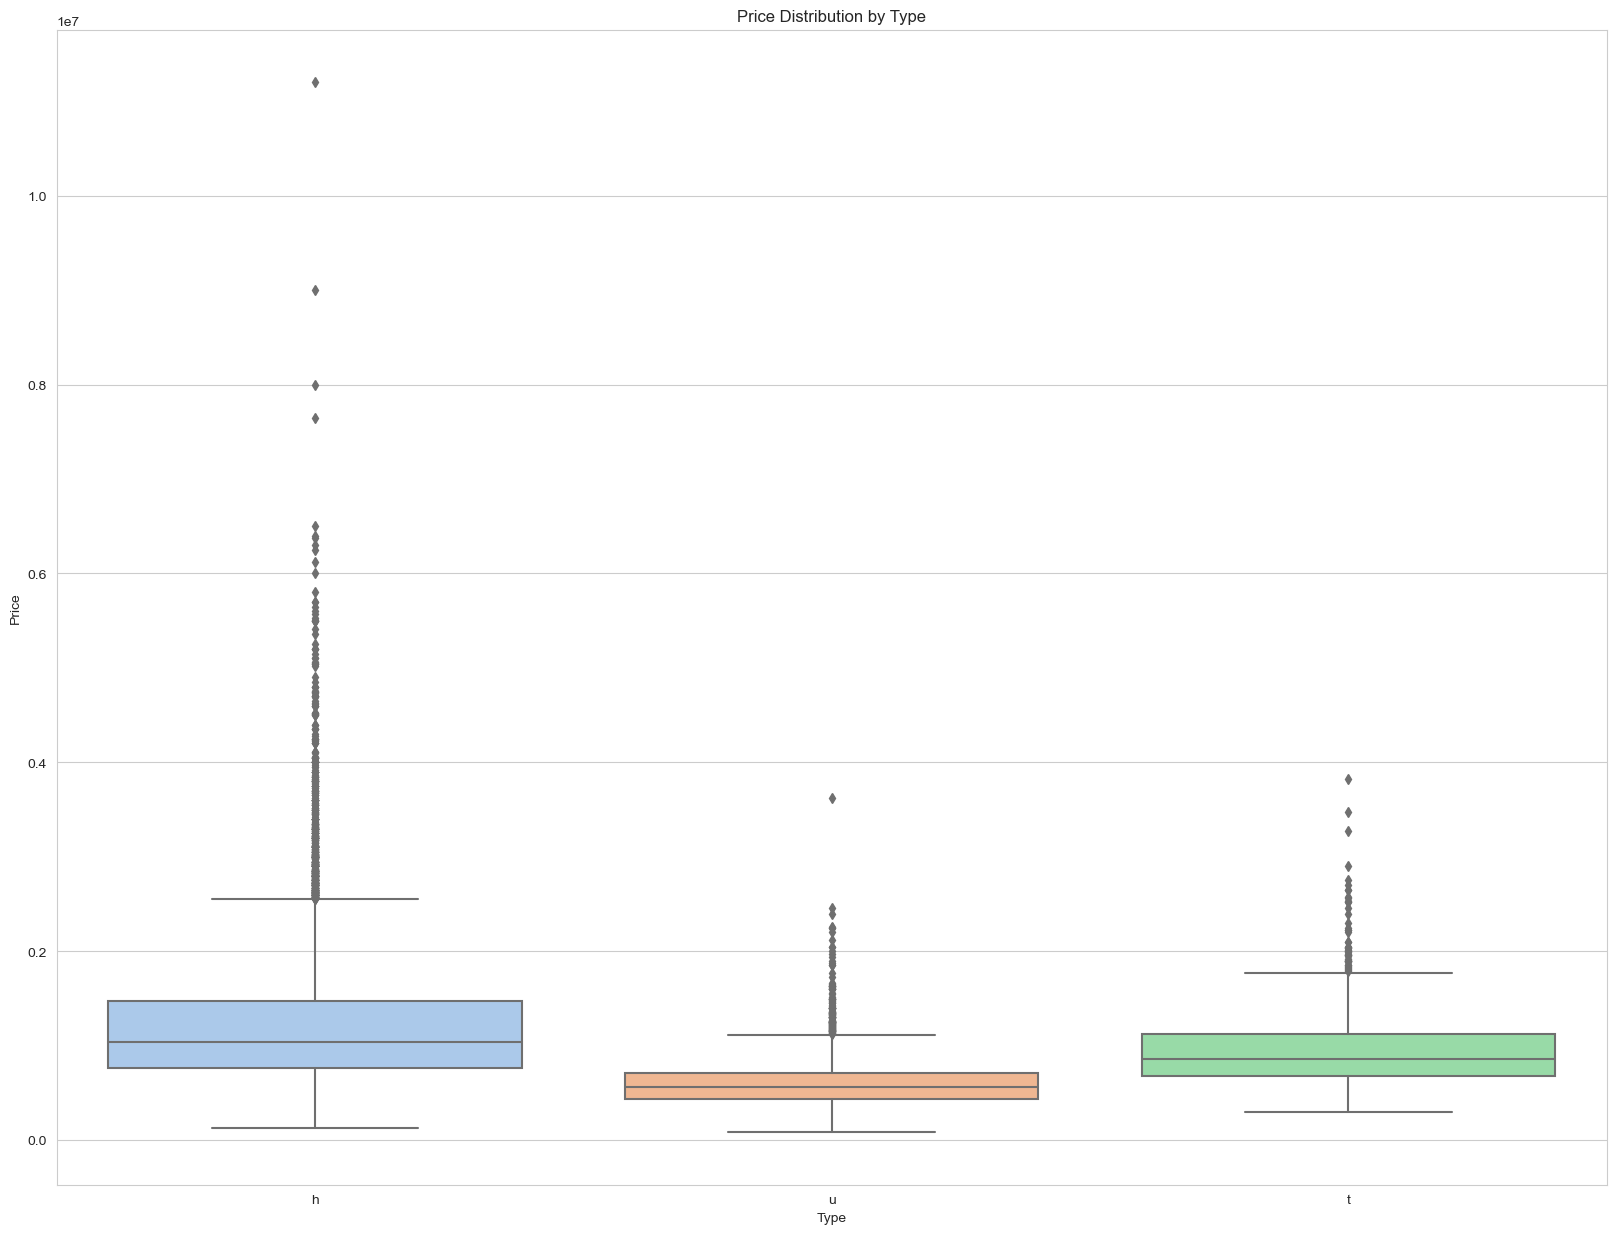

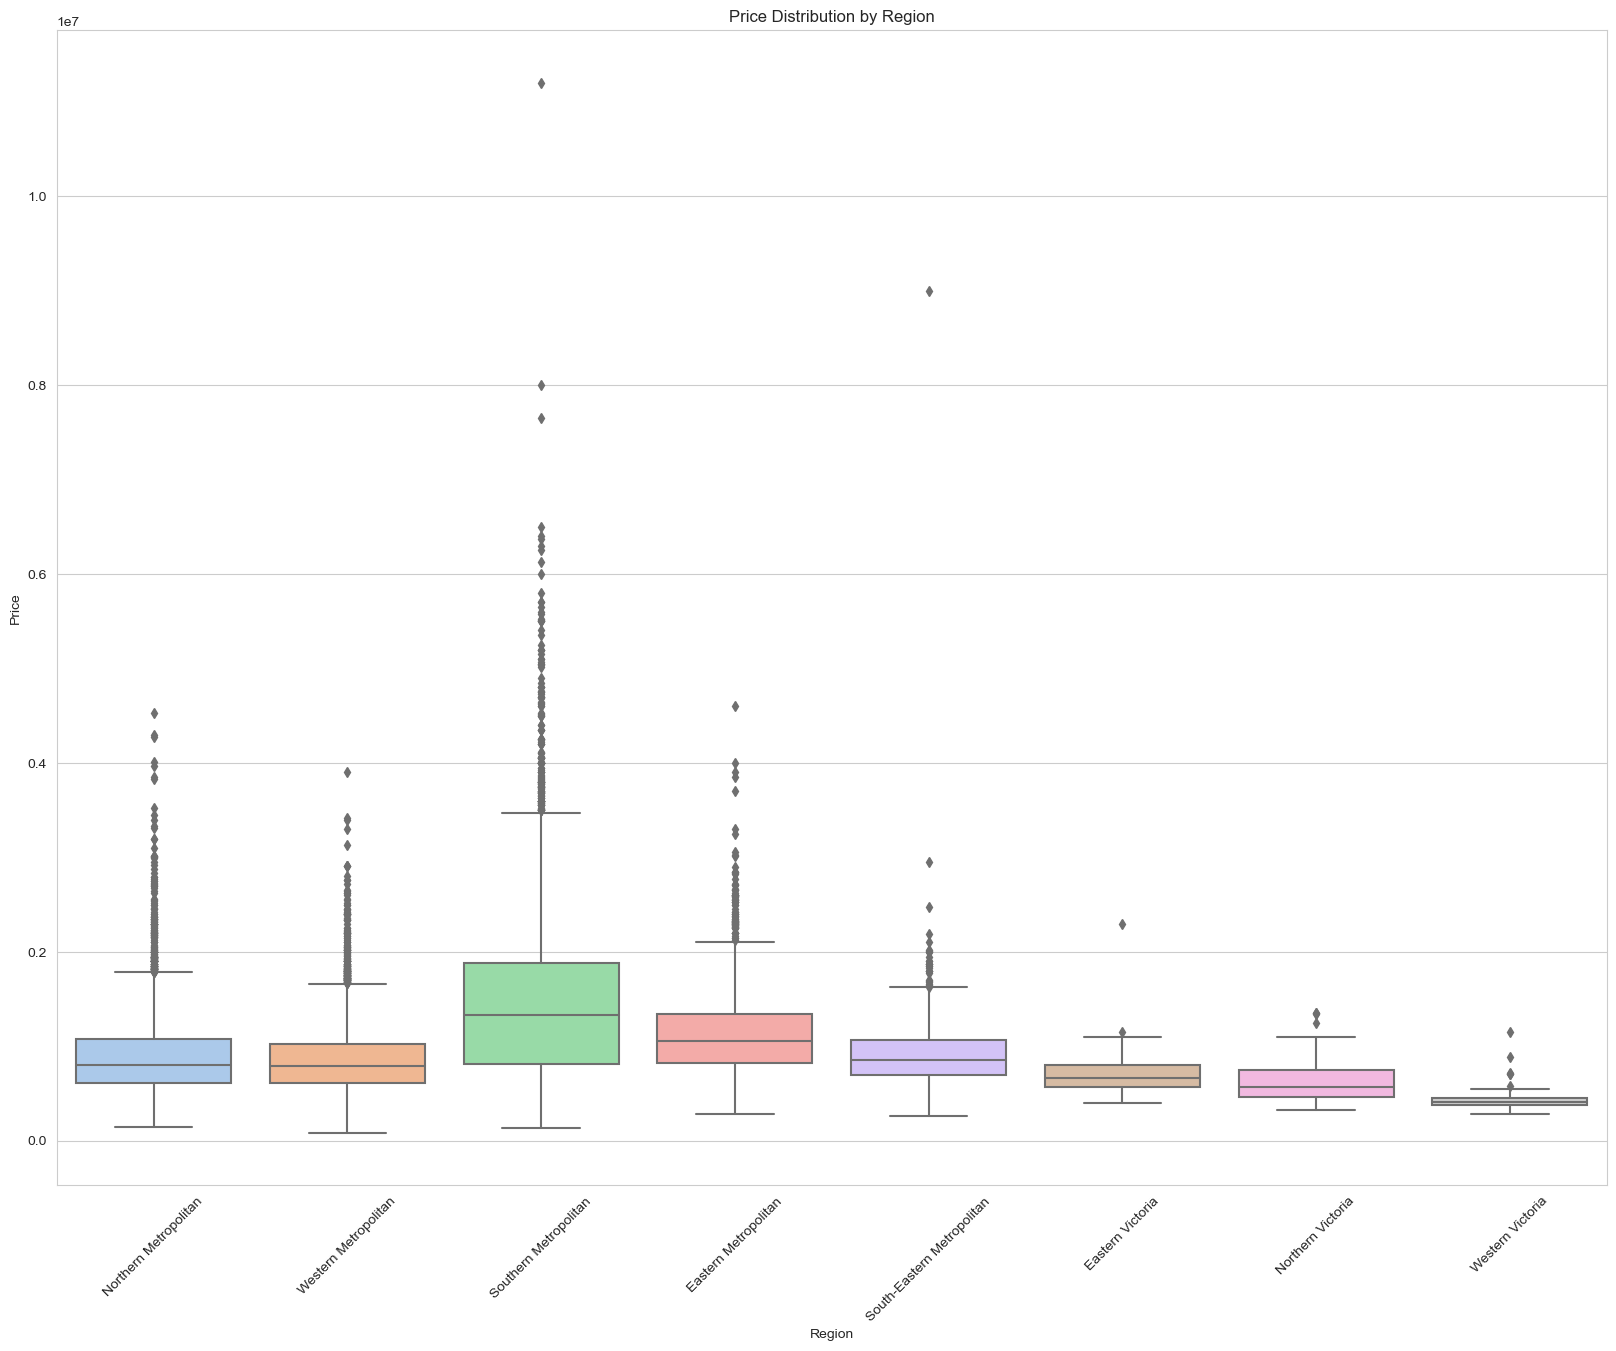

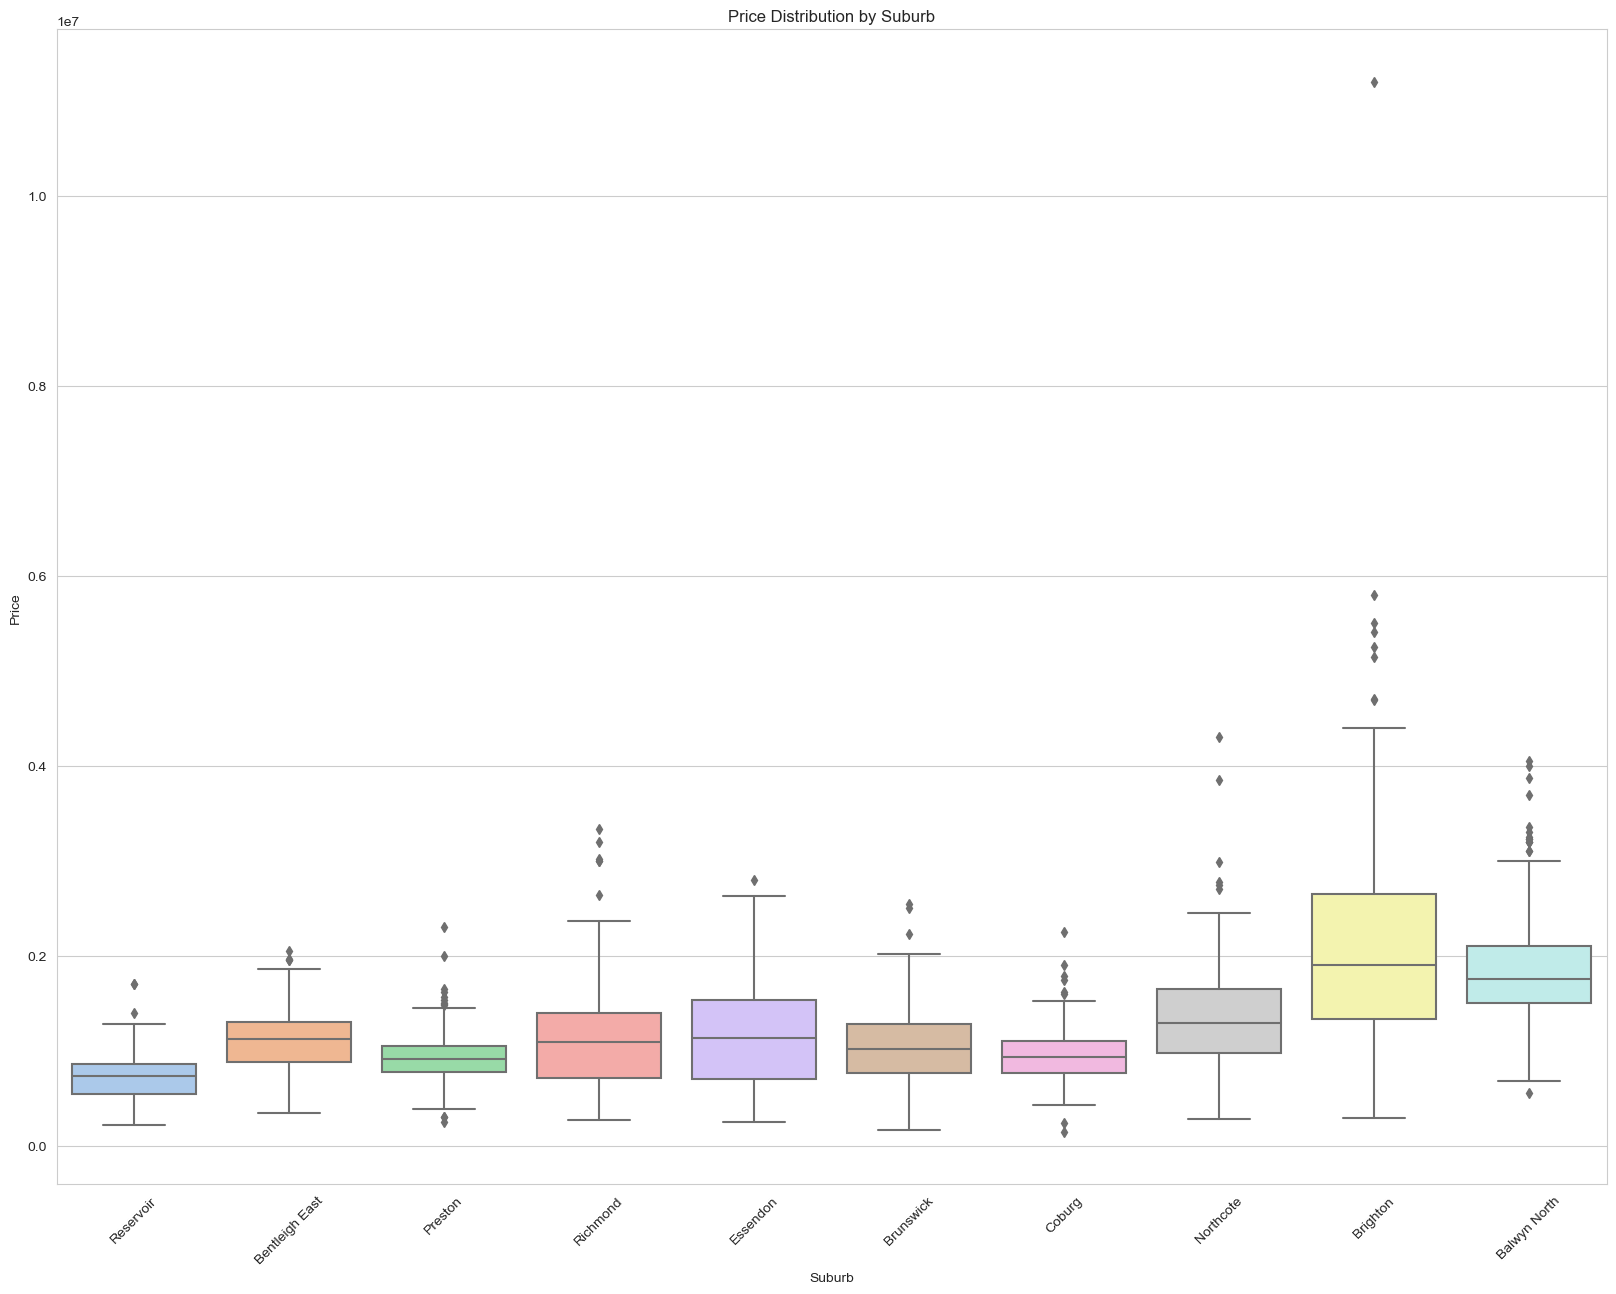

In [16]:
# Visualize some relationships using scatter plots and box plots to get a clearer understanding
# Set up the figure size
plt.figure(figsize=(20, 15))

# Scatter plot for Price vs. Distance
plt.figure(figsize=(20, 15))
sns.scatterplot(x='Distance', y='Price', data=df, alpha=0.5)
plt.title('Price vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.savefig('../EDA_Output/price_vs_distance.jpg')
plt.show()

# Box plot for Price vs. Type
plt.figure(figsize=(20, 15))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Price Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.savefig('../EDA_Output/price_distribution_by_type.jpg')
plt.show()

# Box plot for Price vs. Region
plt.figure(figsize=(20, 15))
sns.boxplot(x='Region', y='Price', data=df)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.savefig('../EDA_Output/price_distribution_by_region.jpg')
plt.show()

# Get the top 10 most frequent suburbs
top_suburbs = df['Suburb'].value_counts().head(10).index

# Filter the dataframe to include only those suburbs
filtered_df = df[df['Suburb'].isin(top_suburbs)]

# Plot the box plot Price vs. Suburb
plt.figure(figsize=(20, 15))
sns.boxplot(x='Suburb', y='Price', data=filtered_df, order=top_suburbs)
plt.title('Price Distribution by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.savefig('../EDA_Output/price_distribution_by_suburb.jpg')
plt.show()

**The visualizations provide some insights into the relationships between different features and the property price:**

- **Price vs. Distance**:
  - There's a general trend indicating that properties closer to the city center are priced higher. However, there are still many high-priced properties located farther from the city center, likely influenced by other factors like property type, amenities, etc.
  
- **Price Distribution by Type**:
  - Houses (h) tend to have a wider price range compared to units (u) and townhouses (t).
  - The median price for houses is higher than that of units but somewhat comparable to townhouses.
  
- **Price Distribution by Region**:
  - The Southern Metropolitan region tends to have the highest median property price, followed by the Eastern Metropolitan region.
  - Other regions like Northern Victoria and Western Victoria have lower median prices.

## Analyzing the Target Variable: Price

We'll visualize the distribution of the `Price` feature and apply a log transformation to check if it results in a more normal distribution.

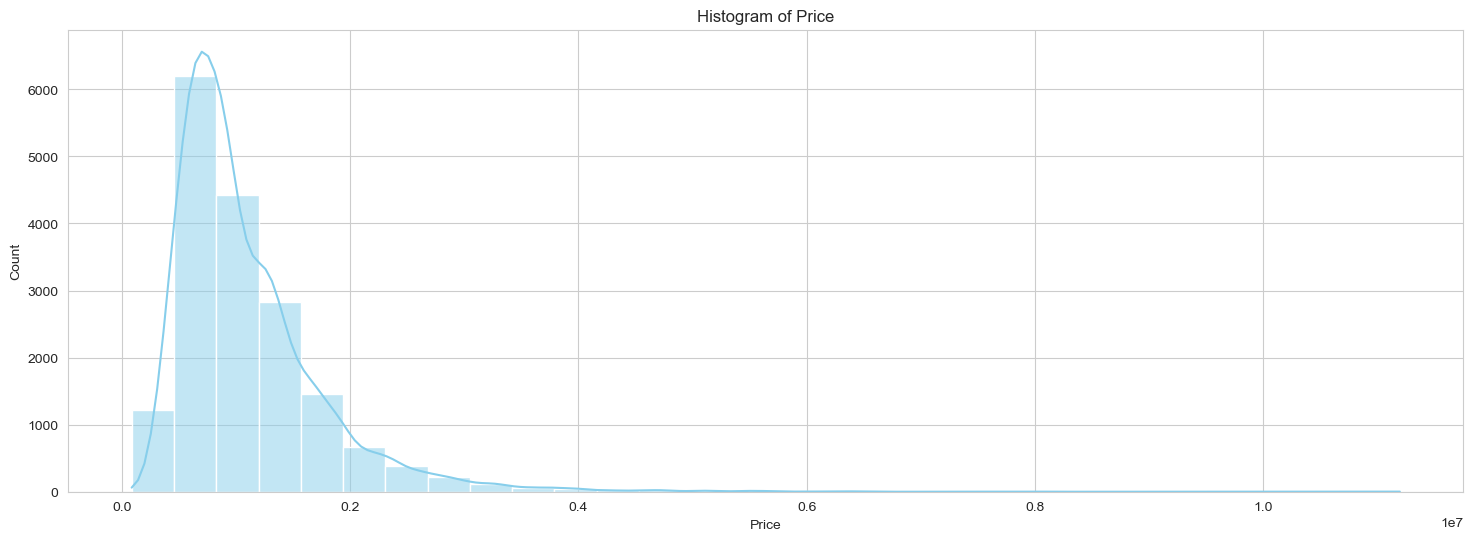

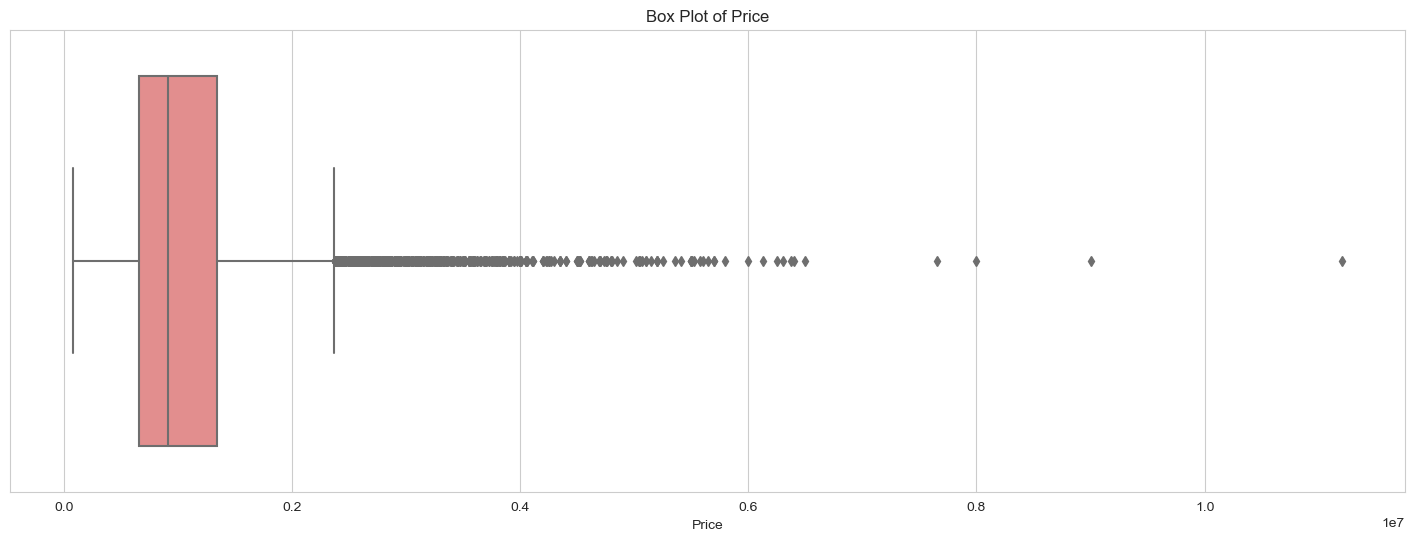

In [17]:
# Histogram with KDE
plt.figure(figsize=(18, 6))
sns.histplot(df['Price'], color='skyblue', bins=30, kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('../EDA_Output/price_feature_distribution_histogram.jpg')
plt.show()

# Box Plot
plt.figure(figsize=(18, 6))
sns.boxplot(x=df['Price'], color='lightcoral')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.savefig('../EDA_Output/price_feature_distribution_boxplot.jpg')
plt.show()

## Enumerate Type, Suburb & Region

In [18]:
# Enumerate Type
encode_1 = LabelEncoder().fit(df['Type'])
encode_type = {x: i for i, x in enumerate(encode_1.classes_)}
encode_type

{'h': 0, 't': 1, 'u': 2}

In [19]:
# Enumerate Suburb
encode_2 = LabelEncoder().fit(df['Suburb'])
encode_suburb = {x: i for i, x in enumerate(encode_2.classes_)}
encode_suburb

{'Abbotsford': 0,
 'Aberfeldie': 1,
 'Airport West': 2,
 'Albanvale': 3,
 'Albert Park': 4,
 'Albion': 5,
 'Alphington': 6,
 'Altona': 7,
 'Altona Meadows': 8,
 'Altona North': 9,
 'Ardeer': 10,
 'Armadale': 11,
 'Ascot Vale': 12,
 'Ashburton': 13,
 'Ashwood': 14,
 'Aspendale': 15,
 'Aspendale Gardens': 16,
 'Attwood': 17,
 'Avondale Heights': 18,
 'Bacchus Marsh': 19,
 'Balaclava': 20,
 'Balwyn': 21,
 'Balwyn North': 22,
 'Bayswater': 23,
 'Bayswater North': 24,
 'Beaconsfield': 25,
 'Beaconsfield Upper': 26,
 'Beaumaris': 27,
 'Bellfield': 28,
 'Bentleigh': 29,
 'Bentleigh East': 30,
 'Berwick': 31,
 'Black Rock': 32,
 'Blackburn': 33,
 'Blackburn North': 34,
 'Blackburn South': 35,
 'Bonbeach': 36,
 'Boronia': 37,
 'Botanic Ridge': 38,
 'Box Hill': 39,
 'Braybrook': 40,
 'Briar Hill': 41,
 'Brighton': 42,
 'Brighton East': 43,
 'Broadmeadows': 44,
 'Brookfield': 45,
 'Brooklyn': 46,
 'Brunswick': 47,
 'Brunswick East': 48,
 'Brunswick West': 49,
 'Bulleen': 50,
 'Bullengarook': 51,


In [20]:
# Enumerate Region
encode_3 = LabelEncoder().fit(df['Region'])
encode_region = {x: i for i, x in enumerate(encode_3.classes_)}
encode_region

{'Eastern Metropolitan': 0,
 'Eastern Victoria': 1,
 'Northern Metropolitan': 2,
 'Northern Victoria': 3,
 'South-Eastern Metropolitan': 4,
 'Southern Metropolitan': 5,
 'Western Metropolitan': 6,
 'Western Victoria': 7}

# Convert to numerical variable

In [21]:
# Convert to numerical variable 
df['Suburb'] = LabelEncoder().fit_transform(df['Suburb'])
df['Suburb']

1          0
2          0
4          0
5          0
6          0
        ... 
34849    327
34852    332
34853    332
34854    332
34856    332
Name: Suburb, Length: 17698, dtype: int32

In [22]:
# Convert to numerical variable 
df['Type'] = LabelEncoder().fit_transform(df['Type'])
df['Type']

1        0
2        0
4        0
5        0
6        0
        ..
34849    0
34852    0
34853    0
34854    1
34856    0
Name: Type, Length: 17698, dtype: int32

In [23]:
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Region']

1        2
2        2
4        2
5        2
6        2
        ..
34849    2
34852    6
34853    6
34854    6
34856    6
Name: Region, Length: 17698, dtype: int32

In [24]:
# Displaying the enumerated dataframe
df.head()

Suburb  Rooms  Type      Price  Distance  Bathroom  Car  Region
1       0      2     0  1480000.0       2.5       1.0  1.0       2
2       0      2     0  1035000.0       2.5       1.0  0.0       2
4       0      3     0  1465000.0       2.5       2.0  0.0       2
5       0      3     0   850000.0       2.5       2.0  1.0       2
6       0      4     0  1600000.0       2.5       1.0  2.0       2

# Enumerated Data Overview

Suburb
-0.0431607503701701


<Figure size 1000x600 with 0 Axes>

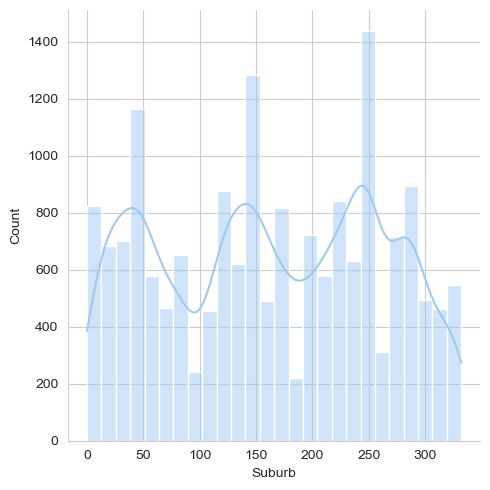

Rooms
0.3518755141904968


<Figure size 1000x600 with 0 Axes>

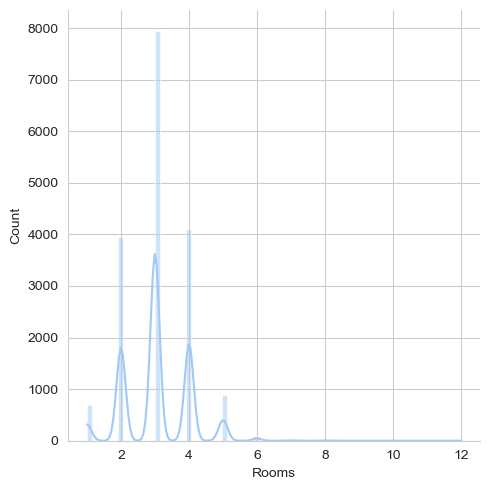

Type
1.4237394343301917


<Figure size 1000x600 with 0 Axes>

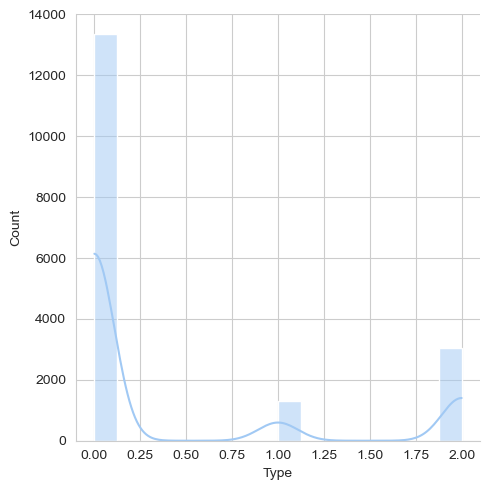

Price
2.444089096584516


<Figure size 1000x600 with 0 Axes>

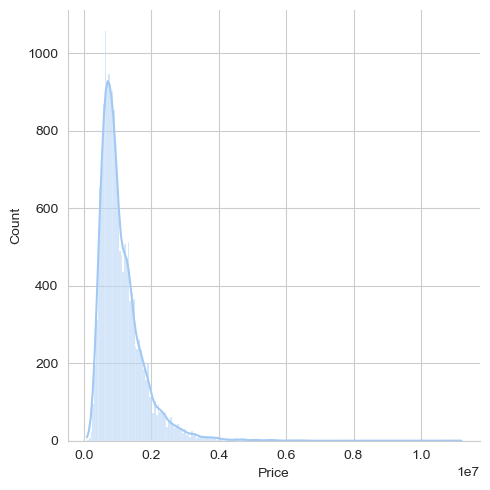

Distance
1.5618099245089718


<Figure size 1000x600 with 0 Axes>

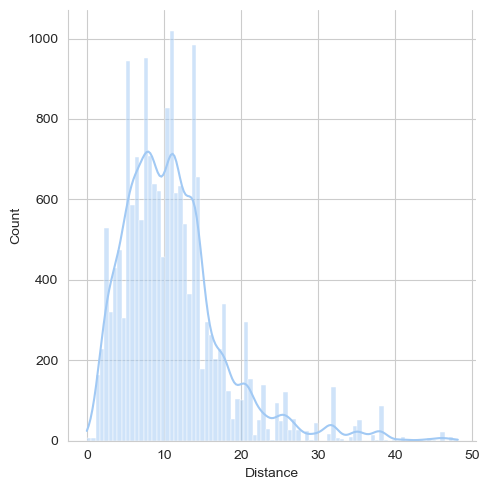

Bathroom
1.3162855244356522


<Figure size 1000x600 with 0 Axes>

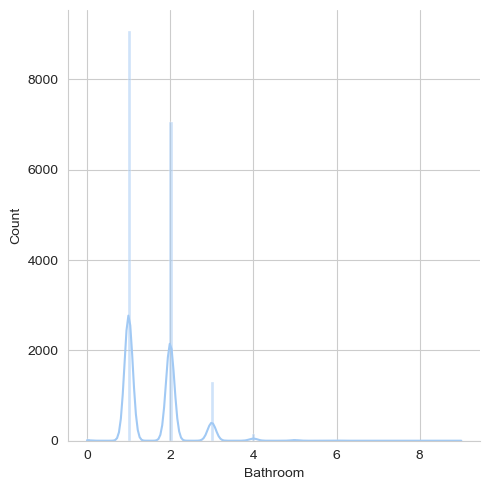

Car
1.6179548790691354


<Figure size 1000x600 with 0 Axes>

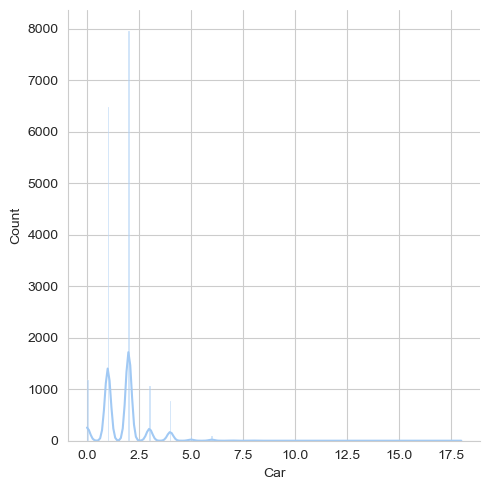

Region
-0.4543135220733773


<Figure size 1000x600 with 0 Axes>

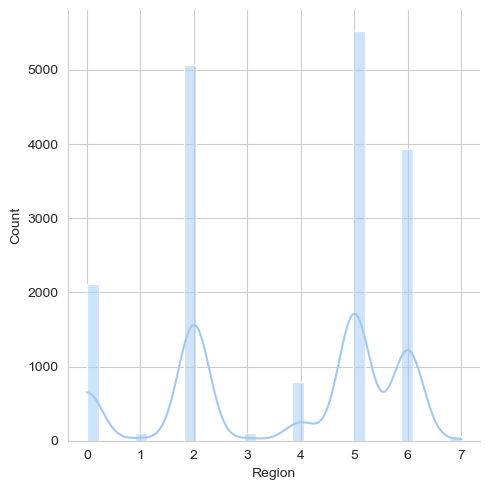

In [25]:
# Check the skewness
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.displot(df[col], kde=True)
    plt.savefig('../EDA_Output/enumerated_skewness.jpg')
    plt.show()

# Understanding Skewness
Symmetrical Distribution (Skewness ≈ 0): If the left side of the distribution (tail) mirrors the right side, the distribution is considered symmetrical. The mean, median, and mode of a symmetrical distribution are typically the same or very close.

Positive Skewness (Right-skewed): If the right tail (larger values) is longer than the left tail, the distribution is said to be right-skewed. In a positively skewed distribution, the mean is typically greater than the median.

Negative Skewness (Left-skewed): If the left tail (smaller values) is longer than the right tail, the distribution is said to be left-skewed. In a negatively skewed distribution, the mean is typically less than the median.

# Skewness analysis based seaborn charts

Almost Symmetrical Distribution:
- Suburb: -0.0431607503701701


Positive Skewness (Right-skewed):
- Rooms: 0.3518755141904968
- Bathroom: 1.3162855244356522
- Type: 1.4237394343301917
- Distance: 1.5618099245089718
- Car: 1.6179548790691354
- Price: 2.444089096584516 (Highly skewed)

Negative Skewness (Left-skewed):
- Region: -0.4543135220733773



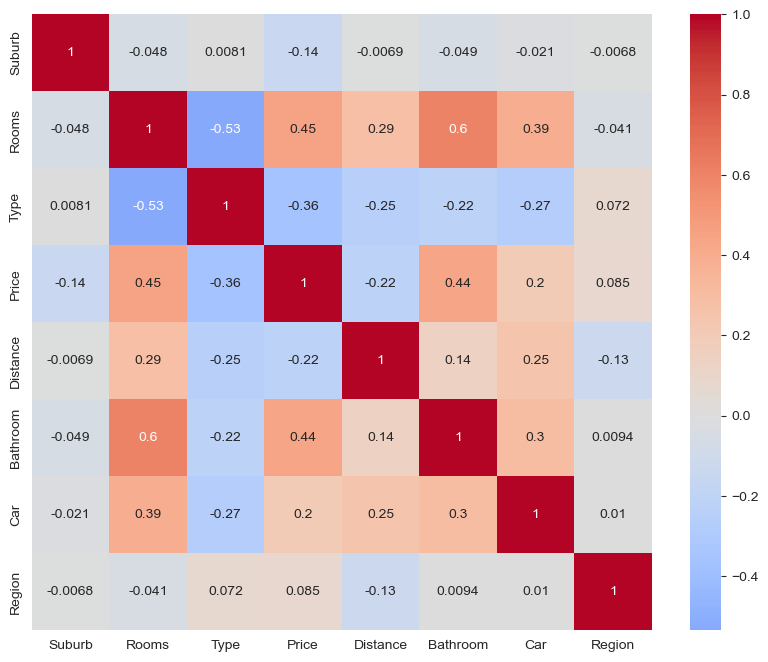

In [26]:
# Rechecking correlation analysis
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with a diverging colormap, setting the 'center' to 0
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)

# Display the heatmap
plt.savefig('../EDA_Output/enumerated_heatmap.jpg')
plt.show()

## Understanding Heatmap correlation: 
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. 
Values closer to zero means there is no linear trend between the two variables. 

The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 

A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

## Correlation Analysis with Price based on the heatmap:

Absolute Correlation:
- Price: 1

Positive Corrrelation:
- Rooms:0.45
- Bathrooms: 0.44
- Car: 0.2

Negative Correlation:
- Type:-0.36
- Distance: -0.22
- Suburb: -0.14

Almost no correlation / No correlation:
- Region: 0.085 (Even though it is almost no correlation but heatmap shows no skewness)


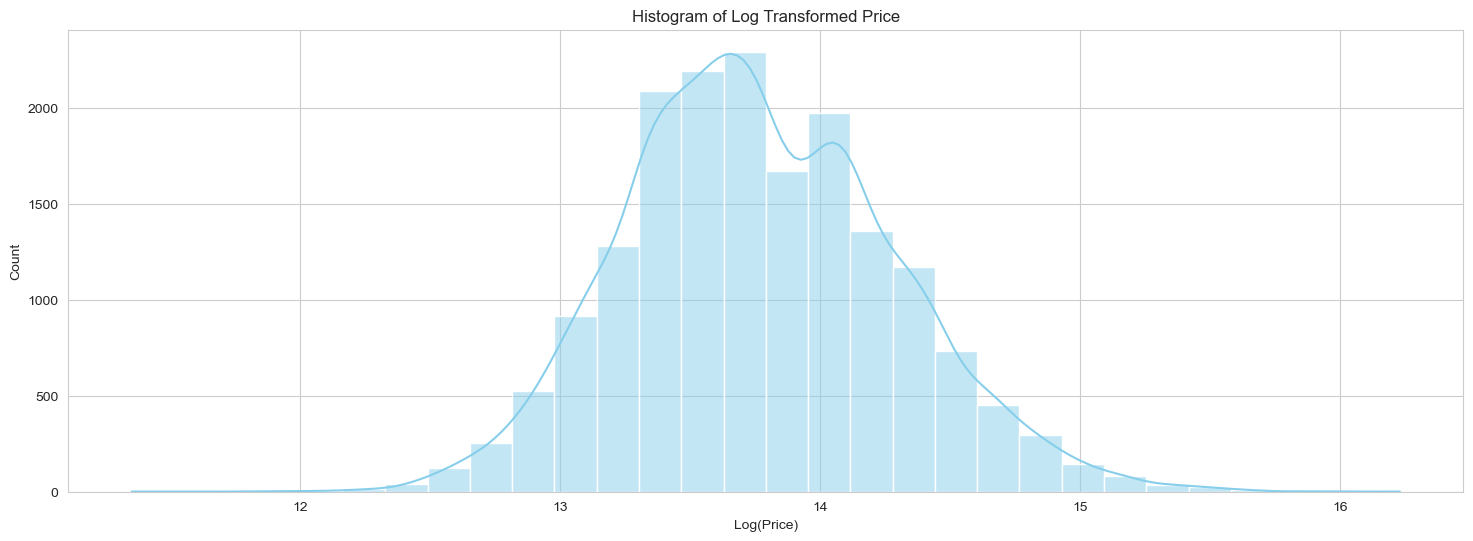

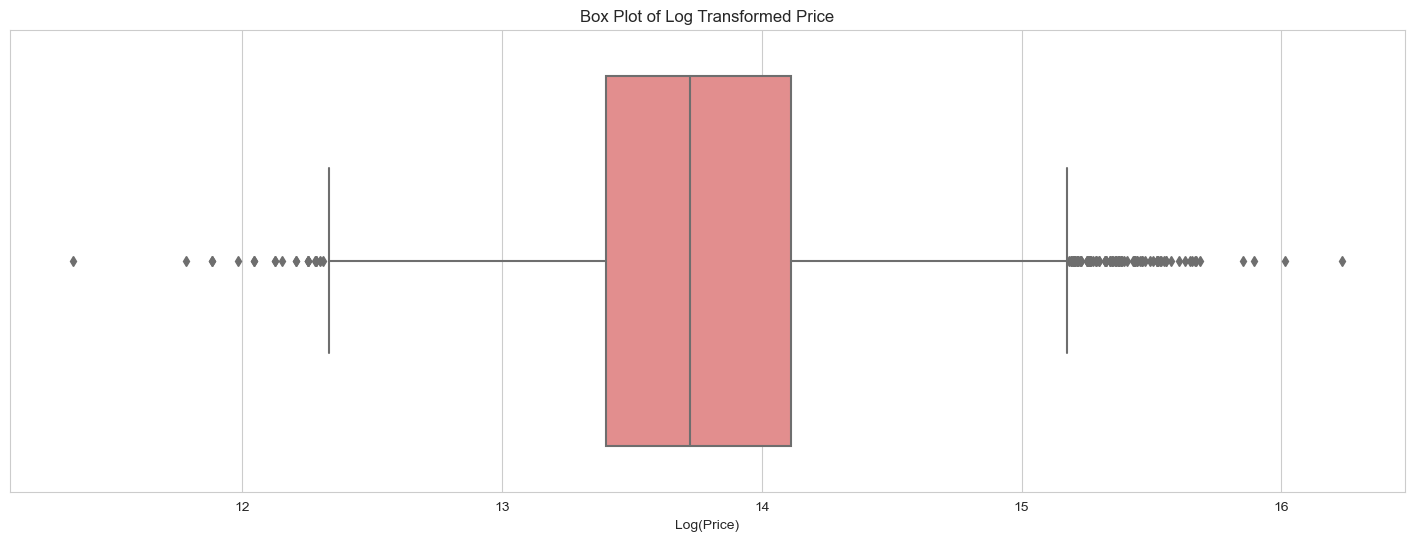

In [27]:
# Applying log transformation to 'Price' and visualizing the distribution
df['Log_Price'] = np.log1p(df['Price'])

# Histogram for Log Transformed Price
plt.figure(figsize=(18, 6))
sns.histplot(df['Log_Price'], color='skyblue', bins=30, kde=True)
plt.title('Histogram of Log Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.savefig('../EDA_Output/log_price_feature_distribution_histogram.jpg')
plt.show()

# Box Plot for Log Transformed Price
plt.figure(figsize=(18, 6))
sns.boxplot(x=df['Log_Price'], color='lightcoral')
plt.title('Box Plot of Log Transformed Price')
plt.xlabel('Log(Price)')
plt.savefig('../EDA_Output/log_price_feature_distribution_boxplot.jpg')
plt.show()

In [28]:
# Save DataFrame as csv
df.to_csv('../Cleaned_Data/Cleaned_Data_LogPrice.csv', index = False)